In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path= '/content/drive/MyDrive/Big Data Analytics/hw3_data.csv'
df= pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 103 entries, sample_num to r1
dtypes: float64(102), int64(1)
memory usage: 155.4 KB


In [4]:
df.describe()

,sample_num,"Permeability, nD","Porosity, fraction",r100,r99,r98,r97,r96,r95,r94,...,r10,r9,r8,r7,r6,r5,r4,r3,r2,r1
count,193.000000,1.930000e+02,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02
mean,96.000000,4.309712e+07,0.130896,17.414075,28.107043,39.152407,50.868562,63.380382,77.048324,91.466499,...,6787.931160,7235.669844,7741.049646,8368.835309,9652.338605,11543.546855,13988.968028,16668.127616,22770.370025,5.379594e+04
std,55.858452,1.400256e+08,0.093677,31.477771,50.680487,76.595317,102.554848,125.944407,155.538670,186.246219,...,15505.867420,16374.239936,17431.528451,18704.429278,21219.865770,28819.739459,39103.280695,50517.882746,66985.476598,3.595755e+05
min,0.000000,9.500000e+00,0.001900,1.552566,1.585565,1.600765,1.611499,1.629252,1.676293,1.706281,...,4.430746,4.480155,4.507268,4.628283,4.893288,5.296344,5.443614,5.566044,5.677747,5.789449e+00
25%,48.000000,3.800000e+04,0.052500,1.869085,2.984674,3.632112,4.221694,5.207556,5.589670,6.854723,...,171.652453,176.149501,217.597816,225.807700,273.255313,301.800558,345.314066,464.982838,557.510000,7.614101e+02
50%,96.000000,1.412000e+06,0.111000,2.146003,9.153229,15.969671,23.649596,31.337246,40.247421,42.188588,...,1133.234229,1185.759080,1225.933976,1298.333934,1469.643386,1512.606522,1731.981201,1993.602267,2249.057560,3.190570e+03
75%,144.000000,1.400000e+07,0.190000,18.089136,38.073249,48.813700,62.893020,74.770292,85.556274,103.346229,...,4178.503354,4314.419036,5035.952764,5777.797816,6324.578042,8409.076263,10172.489250,10943.183860,16483.189040,2.625753e+04
max,192.000000,8.745400e+08,0.474000,292.554079,556.421926,863.882345,1069.480018,1185.121851,1306.079082,1440.622450,...,100377.078400,104724.899600,112927.188800,123831.282400,134735.376000,273822.695500,439953.813400,606084.931200,772216.049100,4.903850e+06


In [5]:
X= df.iloc[:,3:104]

In [6]:
y= df['Permeability, nD']

Multicollinearity Assumption

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data= pd.DataFrame()
vif_data['Features']= X.columns
vif_data['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

   Features           VIF
0      r100     24.659047
1       r99    530.940061
2       r98   2958.857998
3       r97   8252.561290
4       r96  13437.483280
..      ...           ...
95       r5   8240.561190
96       r4  21569.756733
97       r3  26586.098130
98       r2    883.674191
99       r1    107.186479

[100 rows x 2 columns]


In [8]:
print(vif_data[vif_data["VIF"] > 10])

   Features           VIF
0      r100     24.659047
1       r99    530.940061
2       r98   2958.857998
3       r97   8252.561290
4       r96  13437.483280
..      ...           ...
95       r5   8240.561190
96       r4  21569.756733
97       r3  26586.098130
98       r2    883.674191
99       r1    107.186479

[100 rows x 2 columns]


Split the data into 80% training and 20% test

In [9]:
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size= 0.2, random_state=0)

Since we have high values of VIF, we decided to apply Ridge Regression and Lasso Regression

In [10]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

Finding the best alpha values for Ridge and Lasso

In [11]:
ridge = RidgeCV(alphas=[0.1, 1, 10], store_cv_values=True)
ridge.fit(X_train, y_train)

lasso = LassoCV(alphas=[0.1, 1, 10,30], cv=5)
lasso.fit(X_train, y_train)

print("Optimal Alpha for Ridge:", ridge.alpha_)
print("Optimal Alpha for Lasso:", lasso.alpha_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4117258374458299e+17, tolerance: 241489063522687.34
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.937483277077658e+16, tolerance: 241489063522687.34
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number 

Optimal Alpha for Ridge: 10.0
Optimal Alpha for Lasso: 0.1


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0384394362067426e+17, tolerance: 239574444456308.6
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.056826045593803e+16, tolerance: 239574444456308.6
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.080e+17, tolerance: 3.133e+14
  model = cd_fast.enet_coordinate_descent(


In a certain list, we got that the best alpha value for Ridge Regression is 10 and for Lasso 0.1

# Rigde Regression

In [12]:
ridge_model= Ridge(alpha= 10)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=10)

In [13]:
ridge_model.intercept_

42918110.79721804

In [14]:
ridge_model.coef_

array([ 23882645.19599142,   2110929.19532607,  -4370251.95949089,
       -17797278.36020555, -12285725.28357092,  -8445327.3882427 ,
       -13652007.28495893,  -5425754.44980768,   5340923.88991481,
         2034729.1745859 ,  20406277.87556848,  15731352.64724752,
         7672917.36487154,   3509780.65554016,   1499399.11259233,
          887549.61741964,  -1635969.9376805 ,  -3249998.69124418,
         -568899.89716343,   7907733.14464232,   7086675.85577824,
         3494478.55159435,  -7693721.28512549,     27727.99522433,
        -3300516.20406387,  -5232347.27687369,  -4458465.31422697,
        -6001399.45245061,  -1264608.30939577,   3580513.70773757,
         6294819.31911238,  12773669.43250562,   7164060.24356591,
         4505842.60763752,   -129768.1505758 ,  -5721368.23204484,
       -10021912.04214416, -11764980.61145614, -14925887.91382332,
       -15885507.94740945, -18106906.89005541, -18133113.23245021,
       -12688263.13067523,  -8716342.41127549, -14371813.05054

In [15]:
y_pred_train= ridge_model.predict(X_train_scaled)
y_pred_train

array([ 4.37246005e+07, -4.37846755e+06,  5.23785286e+07,  3.45907667e+06,
        4.10646896e+07, -1.17013074e+07, -5.87878170e+05,  2.52633929e+07,
       -4.33554333e+06, -2.47582667e+06,  3.40181210e+07, -4.14046663e+06,
        1.07182260e+08,  2.44244953e+08, -6.29164149e+05, -4.05104579e+06,
        9.55833142e+07,  3.93262772e+07,  6.82744331e+05,  3.38308265e+07,
       -4.23934115e+06, -5.45205493e+06, -8.86163271e+06,  8.34430921e+07,
        1.17802800e+07,  6.55116326e+07, -2.95296337e+04, -4.43914234e+06,
        2.66912486e+07,  1.51689907e+08,  8.03541051e+07, -4.13418443e+06,
       -2.64172310e+06,  6.32539261e+06,  2.96396092e+07,  1.87607851e+06,
        3.90914573e+08,  3.18721925e+07,  9.28745115e+05, -4.36515870e+06,
       -1.06508889e+07,  2.32693613e+05,  2.69566706e+07,  1.20998904e+07,
       -4.33430259e+06,  3.56735089e+07,  7.02239419e+06,  7.98759659e+07,
        6.26766423e+08,  3.83778351e+07,  2.87058351e+08,  4.36054746e+08,
        5.21392457e+07,  

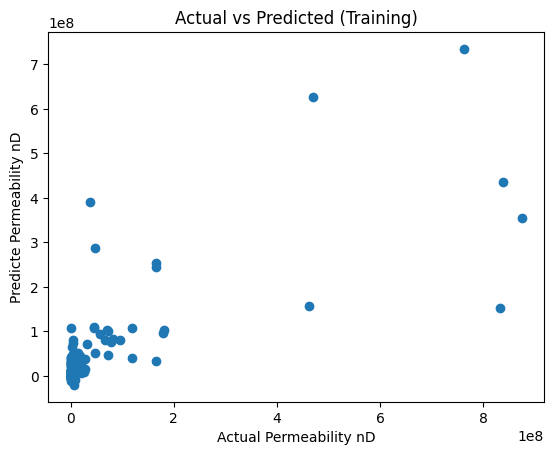

In [16]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Permeability nD')
plt.ylabel('Predicte Permeability nD')
plt.title('Actual vs Predicted (Training)')
plt.show()

In [17]:
y_pred_test= ridge_model.predict(X_test_scaled)

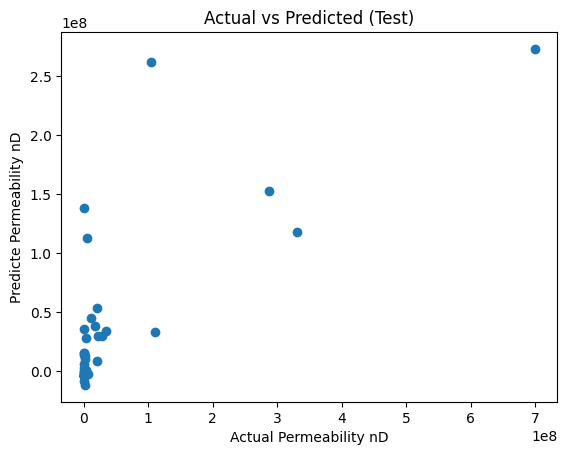

In [18]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Permeability nD')
plt.ylabel('Predicte Permeability nD')
plt.title('Actual vs Predicted (Test)')
plt.show()

In [19]:
r2_score(y_train, y_pred_train)

0.5773671677129993

In [20]:
r2_score(y_test, y_pred_test)

0.505760956684162

# Lasso Regression

In [21]:
lasso_model= Lasso(alpha= 0.1)
lasso_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.080e+17, tolerance: 3.133e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [22]:
lasso_model.intercept_

42918110.79721817

In [23]:
lasso_model.coef_

array([ 3.11218317e+07, -6.66616177e+07,  6.80724902e+07, -8.44869748e+07,
        4.67498592e+07,  1.59236965e+08, -3.96282407e+08,  5.43499062e+07,
        2.16404135e+08, -1.05679228e+08,  6.19310465e+08, -1.15421404e+08,
       -2.39482192e+08, -1.42141303e+08, -1.79001324e+08, -1.32215349e+08,
       -2.05054307e+08, -1.94106980e+08,  6.82940084e+07,  5.31580703e+08,
        4.34659480e+08,  8.60238077e+07, -5.50688508e+08,  3.08807569e+08,
       -1.82686508e+08, -2.02131428e+08, -1.18680066e+08, -1.43513472e+08,
        1.28521979e+08,  1.36992647e+08,  5.86785311e+07,  1.56323306e+08,
       -1.49076025e+08,  2.06944332e+07, -2.55806867e+07,  2.60391894e+07,
        1.36525810e+08,  1.14942430e+08,  1.85888752e+08,  1.49296740e+08,
       -1.18430054e+07, -9.49097210e+07, -1.52964857e+08, -1.37627623e+08,
       -5.35130670e+08, -7.33467060e+07, -1.17442035e+08, -9.92381616e+07,
       -1.75349163e+07, -5.72161978e+07, -9.70682271e+07,  1.83298082e+07,
        9.71517410e+07,  

In [24]:
y_pred_train_lasso= lasso_model.predict(X_train_scaled)
y_pred_train_lasso

array([ 2.63321506e+07, -1.40728490e+07,  6.61349823e+05,  1.11934785e+07,
        3.29552494e+07,  4.51704032e+07, -3.15410797e+06,  6.89468533e+06,
       -1.48188768e+07, -1.33679143e+07,  5.40161464e+07, -8.69926536e+06,
        2.15102357e+07,  1.30626755e+08, -1.12474073e+07, -1.36064356e+07,
        1.42168427e+08,  5.38469213e+07, -2.99234079e+06,  4.04529740e+07,
       -1.42205625e+07, -1.13849392e+07,  2.79757062e+07,  1.08747596e+08,
        1.27417609e+08,  8.60041219e+07, -6.24875144e+05, -1.80120199e+05,
       -2.05261439e+06,  3.60966200e+08,  7.45771737e+07, -1.36634804e+07,
       -8.84695304e+06,  4.77115219e+06,  3.97452409e+07,  4.83966049e+07,
        1.64672431e+08,  2.87189421e+07, -2.59523710e+07, -1.44762668e+07,
       -1.09473383e+07,  5.72964299e+07,  2.21460619e+07, -5.77972330e+06,
       -1.43605869e+07,  1.02834165e+07, -2.40728551e+07,  4.78342924e+07,
        5.54286915e+08,  4.01113115e+07, -1.44497149e+08,  6.84697453e+08,
        6.34631388e+07,  

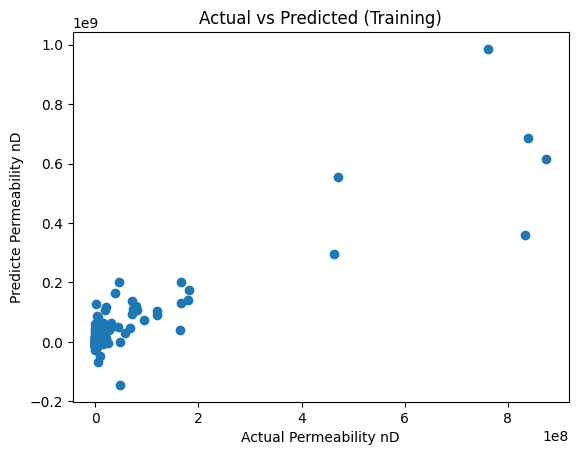

In [25]:
plt.scatter(y_train, y_pred_train_lasso)
plt.xlabel('Actual Permeability nD')
plt.ylabel('Predicte Permeability nD')
plt.title('Actual vs Predicted (Training)')
plt.show()

In [27]:
y_pred_test_lasso= lasso_model.predict(X_test_scaled)

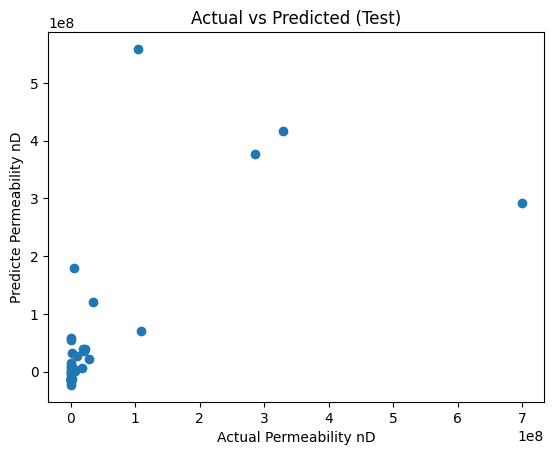

In [28]:
plt.scatter(y_test, y_pred_test_lasso)
plt.xlabel('Actual Permeability nD')
plt.ylabel('Predicte Permeability nD')
plt.title('Actual vs Predicted (Test)')
plt.show()

In [26]:
r2_score(y_train, y_pred_train_lasso)

0.8033465542142587

In [29]:
r2_score(y_test, y_pred_test_lasso)

0.303042207915751